In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [ ]:
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import warnings, cv2
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import warnings, cv2
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = "/content/drive/MyDrive/dataset_new/train"
test_dir = "/content/drive/MyDrive/dataset_new/test"

In [ ]:
def load_images(directory):
    images = []
    labels = []

    for category in os.listdir(directory):
        # Add a trailing forward slash if it's not present
        category_path = os.path.join(directory, category)
        for filename in tqdm(os.listdir(category_path)): # Use os.path.join for paths
            image_path = os.path.join(category_path, filename)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            images.append(image)
            labels.append(category)

    images = np.array(images, dtype='float32')
    return images, labels

In [ ]:
import os
os.listdir('/content/drive/MyDrive/dataset_new')
train_dir = "/content/drive/MyDrive/dataset_new/train"
test_dir = "/content/drive/MyDrive/dataset_new/test"
X_train, y_train = load_images(train_dir)
X_test, y_test = load_images(test_dir)

  0%|          | 0/616 [00:00<?, ?it/s]

  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/106 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

Training samples: 2467
Test samples: 433
Image dimensions: (224, 224, 3)


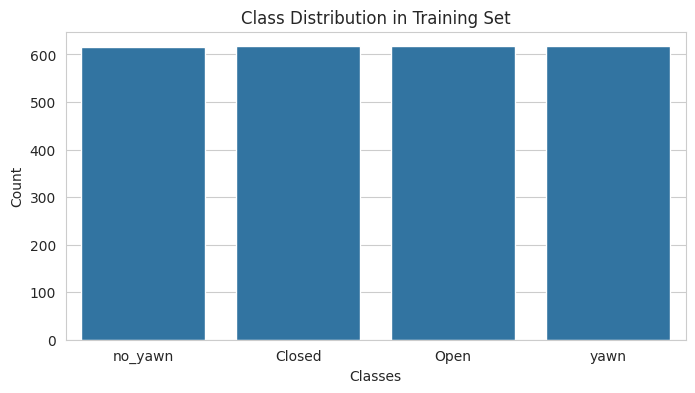

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Display shape of dataset
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Image dimensions: {X_train.shape[1:]}")

# Show class distribution
# Assuming y_train_original holds the original class labels before one-hot encoding
# If you don't have it, you can get it back from the one-hot encoded y_train:
# y_train_original = encoder.inverse_transform(np.argmax(y_train, axis=1))
sns.set_style("whitegrid")
plt.figure(figsize=(8,4))
# Replace y_train with the original class labels
sns.countplot(x=encoder.inverse_transform(np.argmax(y_train, axis=1)))
plt.title("Class Distribution in Training Set")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [ ]:
X_train = X_train / 255.
X_test = X_test / 255.

In [ ]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
cnn = Sequential()

cnn.add(Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(224,224,3)))
cnn.add(MaxPooling2D(pool_size=2))

cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu',padding='same'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

cnn.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))

cnn.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(units=128,activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Dense(units=4,activation='softmax'))

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 111, 111, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 55, 55, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 53, 53, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,458,788 (9.38 MB)

 Trainable params: 2,458,084 (9.38 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy',patience=20,mode='max',verbose=1,restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',patience=5,mode='max',verbose=1,factor=0.1,min_lr=0.001)
checkpoint_filename = 'checkpoint/my_checkpoint.weights.h5' # Changed the filename to include .weights.h5
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filename,monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=True,mode='max')
r = cnn.fit(x=X_train,
            y=y_train,
            epochs=10,
            batch_size=32,
            validation_data=(X_test,y_test),
            callbacks=[early_stopping,reduce_lr,model_checkpoint])

Epoch 1/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6552 - loss: 0.8104
Epoch 1: val_accuracy improved from -inf to 0.25173, saving model to checkpoint/my_checkpoint.weights.h5
78/78 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.6561 - loss: 0.8076 - val_accuracy: 0.2517 - val_loss: 5.2549 - learning_rate: 0.0010
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8099 - loss: 0.3957
Epoch 2: val_accuracy did not improve from 0.25173
78/78 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.8099 - loss: 0.3956 - val_accuracy: 0.2517 - val_loss: 3.5595 - learning_rate: 0.0010
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8419 - loss: 0.3361
Epoch 3: val_accuracy improved from 0.25173 to 0.25404, saving model to checkpoint/my_checkpoint.weights.h5
78/78 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.8419 - loss: 0.3360 - val_accuracy: 0.2540 - val_loss: 4.3778 - learning_rate: 0.0010
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8402

In [ ]:
cnn.load_weights(checkpoint_filename)

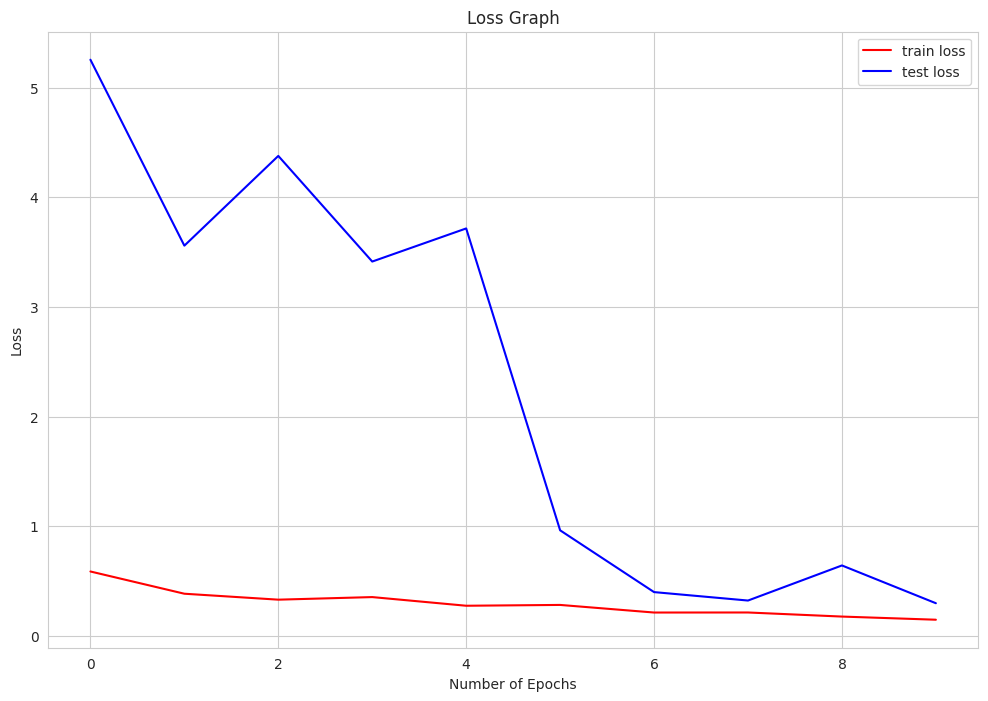

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(r.history['loss'],'r',label='train loss')
plt.plot(r.history['val_loss'],'b',label='test loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend();

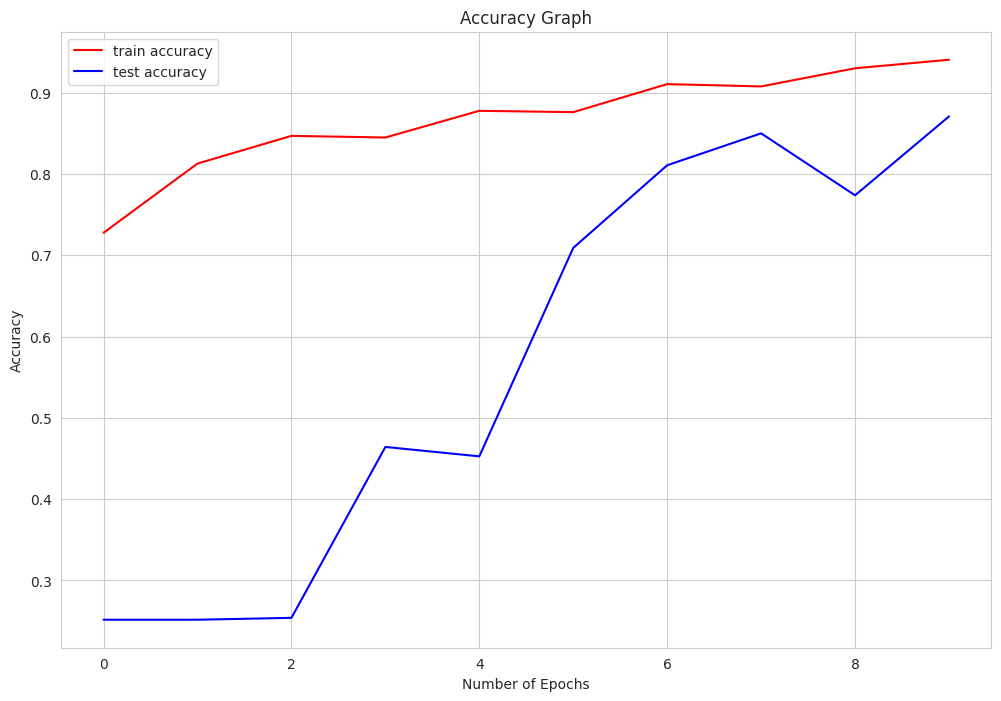

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(r.history['accuracy'],'r',label='train accuracy')
plt.plot(r.history['val_accuracy'],'b',label='test accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend();

In [ ]:
cnn.save(filepath='drowsiness_detector.h5') # Remove save_format and add .h5 extension to filepath
model = load_model(filepath='drowsiness_detector.h5') # Update filepath for loading the model
model

<Sequential name=sequential, built=True>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np


In [ ]:
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=encoder.classes_)) # Use y_pred_classes instead of y_pred


Classification Report:
              precision    recall  f1-score   support

      Closed       0.89      1.00      0.94       109
        Open       0.98      0.90      0.94       109
     no_yawn       0.73      0.99      0.84       109
        yawn       1.00      0.58      0.74       106

    accuracy                           0.87       433
   macro avg       0.90      0.87      0.86       433
weighted avg       0.90      0.87      0.86       433



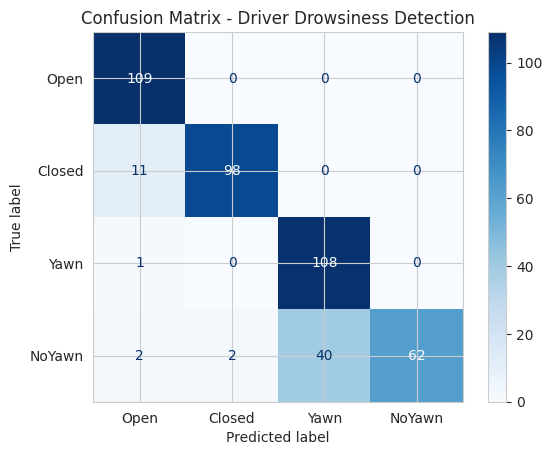

In [ ]:
cm = confusion_matrix(y_true, y_pred_classes)

# Assuming your 4 classes are 'Alert', 'Drowsy', 'class_3', 'class_4'
# Replace with your actual class names
display_labels = ['Open', 'Closed', 'Yawn', 'NoYawn']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)

# Display the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Driver Drowsiness Detection")
plt.show()

In [ ]:
from sklearn.metrics import f1_score
import numpy as np

# Assuming 'model' is your trained model and 'X_test' is your test data
y_pred_probs = model.predict(X_test)  # Get predicted probabilities for each class
y_pred = np.argmax(y_pred_probs, axis=1)  # Get the class with the highest probability
y_true = np.argmax(y_test, axis=1) # Extract true labels from one-hot encoded y_test


print("Macro F1 Score:", f1_score(y_true, y_pred, average='macro'))
print("Micro F1 Score:", f1_score(y_true, y_pred, average='micro'))

14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 505ms/step
Macro F1 Score: 0.8640040949103178
Micro F1 Score: 0.8706697459584296


F1-Score per Class: [0.93965517 0.93779904 0.84046693 0.73809524]
ROC AUC Score: 0.9957411467783056


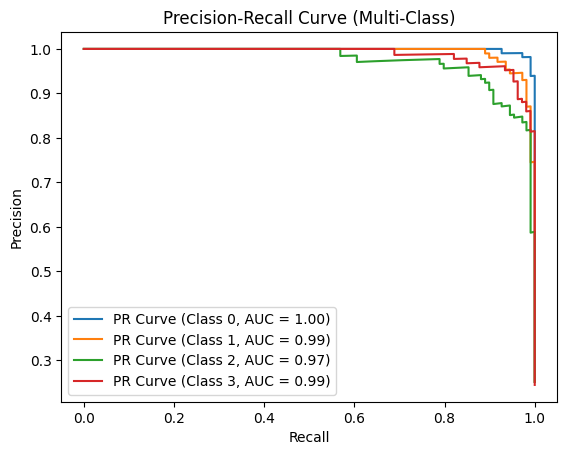

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve, auc

# Calculate F1-Score for each class
f1 = f1_score(y_true, y_pred, average=None)
print(f"F1-Score per Class: {f1}")

# Calculate ROC AUC
roc_auc = roc_auc_score(y_true, y_pred_probs, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc}")

# Plot Precision-Recall Curve for each class separately
for i in range(y_pred_probs.shape[1]): # Loop through each class
    precision, recall, thresholds = precision_recall_curve(y_test[:, i], y_pred_probs[:, i]) # Specify pos_label for each class
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'PR Curve (Class {i}, AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Multi-Class)')
plt.legend(loc='best')
plt.show()